In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Train 37.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [5]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [6]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<AxesSubplot:xlabel='GarageQual'>

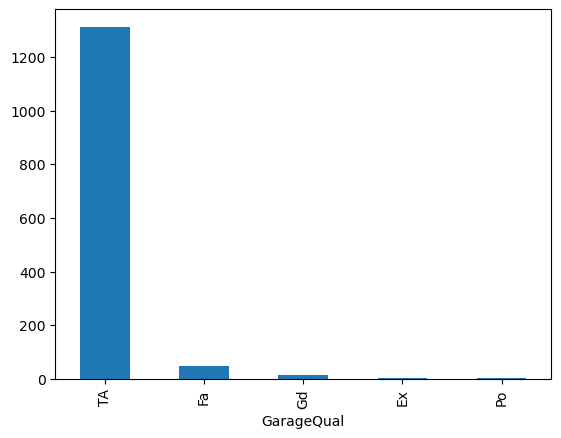

In [7]:
df['GarageQual'].value_counts().plot(kind='bar')

In [8]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

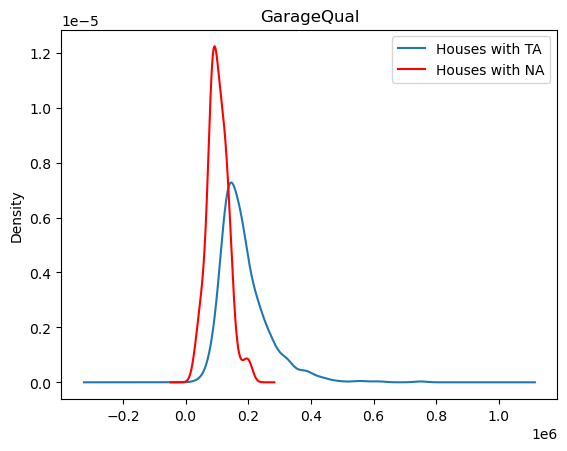

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [10]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [11]:
df['GarageQual'].fillna('TA', inplace=True)

<AxesSubplot:xlabel='GarageQual'>

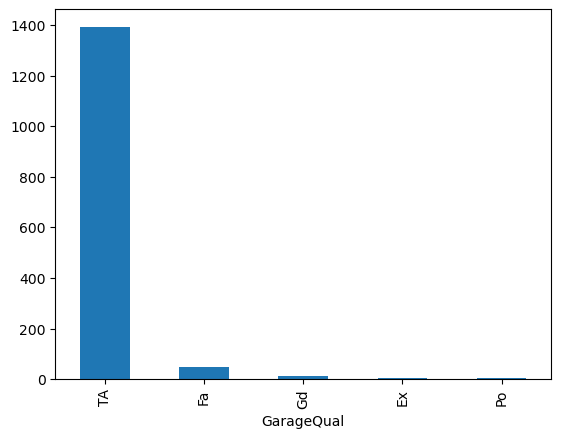

In [12]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

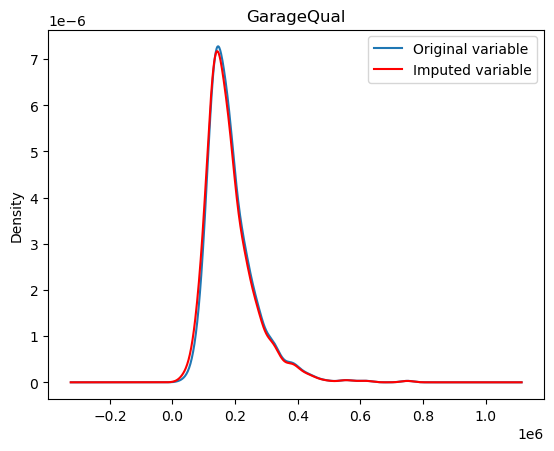

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

<AxesSubplot:xlabel='FireplaceQu'>

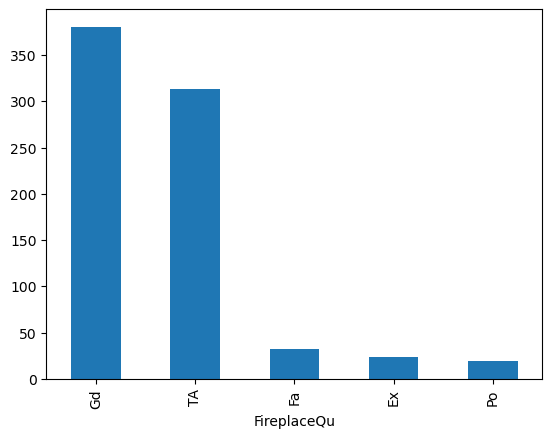

In [14]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [15]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

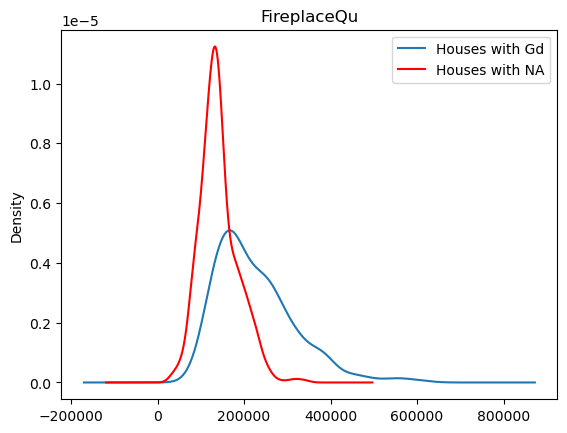

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [17]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [18]:
df['FireplaceQu'].fillna('Gd', inplace=True)

<AxesSubplot:xlabel='FireplaceQu'>

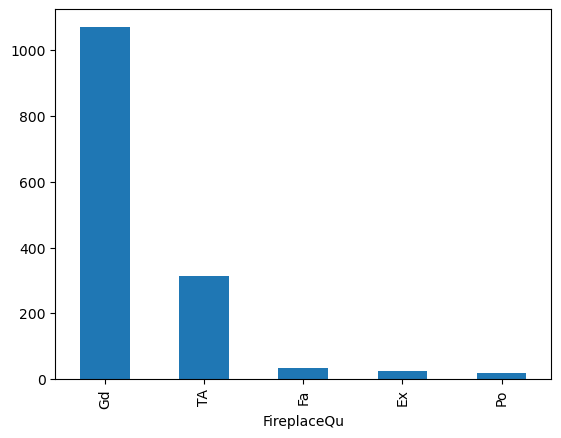

In [19]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

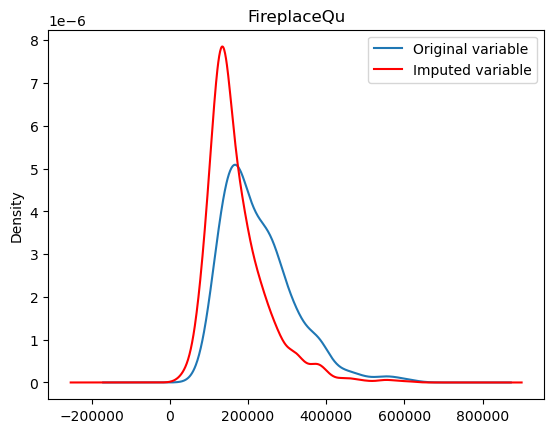

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
imputer = SimpleImputer(strategy='most_frequent')

In [24]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

In [25]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)